Superficie de respuesta 1

In [1]:
# Instalar si es necesario
!pip install numpy pandas matplotlib seaborn scikit-learn plotly


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
# Datos
data = pd.DataFrame({
    'Nopal': [5, 10, 5, 10, 5, 10, 5, 10, 7.5, 7.5, 7.5, 7.5],
    'Piña': [15, 15, 20, 20, 15, 15, 20, 20, 17.5, 17.5, 17.5, 17.5],
    'Jamaica': [1.0, 1.0, 2.0, 2.0, 1.5, 1.5, 1.5, 1.5, 1.25, 1.25, 1.25, 1.25],
    'Brix': [1.35, 0.60, 1.65, 2.15, 1.40, 1.80, 0.75, 0.85, 1.15, 1.20, 1.15, 1.15]
})

In [4]:
# Entradas (factores) y salida
X = data[['Nopal', 'Piña', 'Jamaica']]
y = data['Brix']

In [5]:
# Crear términos cuadráticos e interacciones
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [6]:
# Ajustar modelo cuadrático
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [7]:
# Coeficientes del modelo
print("Términos del modelo:")
for name, coef in zip(poly.get_feature_names_out(X.columns), model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"Intercepto: {model.intercept_:.4f}")


Términos del modelo:
Nopal: 0.4363
Piña: 0.1882
Jamaica: -3.1460
Nopal^2: -0.0453
Nopal Piña: -0.0120
Nopal Jamaica: 0.3100
Piña^2: -0.0022
Piña Jamaica: -0.1216
Jamaica^2: 1.5581
Intercepto: 0.6322


In [8]:
# Graficar superficie de respuesta (Nopal vs Piña, Jamaica fijo)
nopal_range = np.linspace(5, 10, 30)
pina_range = np.linspace(15, 20, 30)
nopal_grid, pina_grid = np.meshgrid(nopal_range, pina_range)
jamaica_fijo = 1.25

In [9]:
# Construir matriz para predicción
X_pred = np.column_stack((
    nopal_grid.ravel(),
    pina_grid.ravel(),
    np.full(nopal_grid.size, jamaica_fijo)
))
X_pred_poly = poly.transform(X_pred)
y_pred = model.predict(X_pred_poly)
y_pred_grid = y_pred.reshape(nopal_grid.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


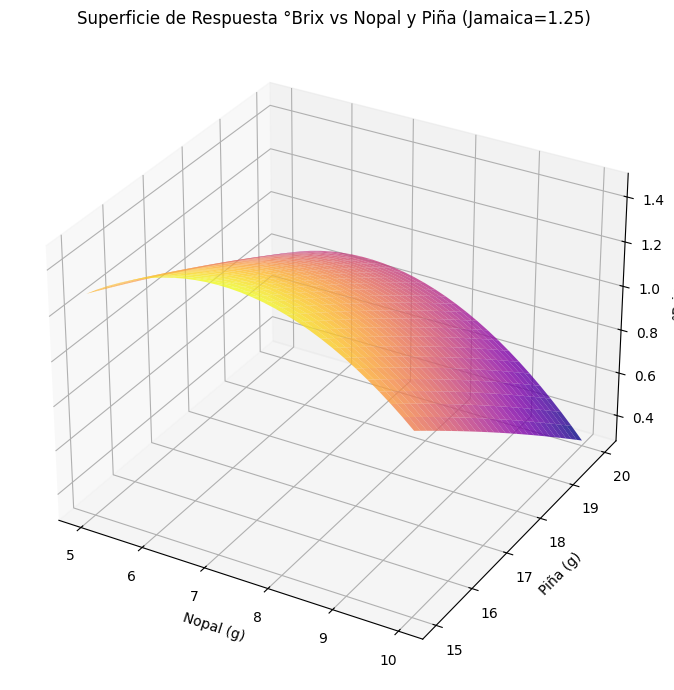

In [10]:
# Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(nopal_grid, pina_grid, y_pred_grid, cmap='plasma', alpha=0.8)
ax.set_xlabel('Nopal (g)')
ax.set_ylabel('Piña (g)')
ax.set_zlabel('°Brix')
ax.set_title('Superficie de Respuesta °Brix vs Nopal y Piña (Jamaica=1.25)')
plt.tight_layout()
plt.show()

MODELOS PARA pH, Preferencia y Antocianinas

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [13]:
# Datos
data = pd.DataFrame({
    'Nopal': [5, 10, 5, 10, 5, 10, 5, 10, 7.5, 7.5, 7.5, 7.5],
    'Piña': [15, 15, 20, 20, 15, 15, 20, 20, 17.5, 17.5, 17.5, 17.5],
    'Jamaica': [1.0, 1.0, 2.0, 2.0, 1.5, 1.5, 1.5, 1.5, 1.25, 1.25, 1.25, 1.25],
    'pH': [2.86, 2.94, 3.01, 2.84, 2.84, 2.82, 2.94, 3.07, 3.08, 2.87, 2.94, 2.98],
    'Preferencia': [3.537, 2.963, 3.278, 2.648, 3.370, 3.259, 3.463, 2.814, 3.111, 2.500, 2.833, 2.888],
    'Antocianinas': [224.1, 28.01, 122.7, 68.47, 149.33, 254.62, 42.0, 21.29, 40.49, 47.09, 46.51, 34.19]
})

In [23]:
# Función para ajustar modelo y graficar superficie
def superficie_respuesta(y_name, fixed_factor='Jamaica', fixed_value=1.25):
    X = data[['Nopal', 'Piña', 'Jamaica']]
    y = data[y_name]

    # Crear términos cuadráticos
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Modelo cuadrático
    model = LinearRegression()
    model.fit(X_poly, y)

    # Rango para dos factores (mantendremos Jamaica constante)
    nopal_range = np.linspace(5, 10, 30)
    pina_range = np.linspace(15, 20, 30)
    nopal_grid, pina_grid = np.meshgrid(nopal_range, pina_range)

    # Jamaica constante
    jam = np.full(nopal_grid.size, fixed_value)
    X_pred = np.column_stack((nopal_grid.ravel(), pina_grid.ravel(), jam))
    X_pred_poly = poly.transform(X_pred)
    y_pred = model.predict(X_pred_poly)
    y_pred_grid = y_pred.reshape(nopal_grid.shape)

    # Plot
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(nopal_grid, pina_grid, y_pred_grid, cmap='plasma', alpha=0.8)
    ax.set_xlabel('Nopal (g)')
    ax.set_ylabel('Piña (g)')
    ax.set_zlabel(y_name)
    ax.set_title(f'Superficie de Respuesta {y_name} vs Nopal y Piña ({fixed_factor}={fixed_value})')
    plt.tight_layout()
    plt.show()

In [19]:
    # Crear términos cuadráticos
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)

In [20]:
    # Modelo cuadrático
    model = LinearRegression()
    model.fit(X_poly, y)

LinearRegression()

In [25]:
    # Rango para dos factores (mantendremos Jamaica constante)
    nopal_range = np.linspace(5, 10, 30)
    pina_range = np.linspace(15, 20, 30)
    nopal_grid, pina_grid = np.meshgrid(nopal_range, pina_range)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
# Datos
data = pd.DataFrame({
    'Nopal': [5, 10, 5, 10, 5, 10, 5, 10, 7.5, 7.5, 7.5, 7.5],
    'Piña': [15, 15, 20, 20, 15, 15, 20, 20, 17.5, 17.5, 17.5, 17.5],
    'Jamaica': [1.0, 1.0, 2.0, 2.0, 1.5, 1.5, 1.5, 1.5, 1.25, 1.25, 1.25, 1.25],
    'pH': [2.86, 2.94, 3.01, 2.84, 2.84, 2.82, 2.94, 3.07, 3.08, 2.87, 2.94, 2.98],
    'Preferencia': [3.537, 2.963, 3.278, 2.648, 3.370, 3.259, 3.463, 2.814, 3.111, 2.500, 2.833, 2.888],
    'Antocianinas': [224.1, 28.01, 122.7, 68.47, 149.33, 254.62, 42.0, 21.29, 40.49, 47.09, 46.51, 34.19]
})

In [36]:
# Función mejorada
def superficie_respuesta(y_name, fixed_factor='Jamaica', fixed_value=1.25):
    print(f"\n🔍 Evaluando modelo para variable: {y_name}")

    X = data[['Nopal', 'Piña', 'Jamaica']]
    y = data[y_name]

    # Crear términos cuadráticos
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Modelo cuadrático
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # Métricas
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    n = X.shape[0]
    p = X_poly.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f"R²:           {r2:.4f}")
    print(f"R² ajustado:  {r2_adj:.4f}")
    print(f"MAE:          {mae:.4f}")
    print(f"MSE:          {mse:.4f}")
    print(f"RMSE:         {rmse:.4f}")

    # Rango y predicción
    nopal_range = np.linspace(5, 10, 30)
    pina_range = np.linspace(15, 20, 30)
    nopal_grid, pina_grid = np.meshgrid(nopal_range, pina_range)

    # Jamaica fijo
    jam = np.full(nopal_grid.size, fixed_value)
    X_pred = np.column_stack((nopal_grid.ravel(), pina_grid.ravel(), jam))
    X_pred_poly = poly.transform(X_pred)
    y_pred_grid = model.predict(X_pred_poly).reshape(nopal_grid.shape)

    # Plot
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(nopal_grid, pina_grid, y_pred_grid, cmap='plasma', alpha=0.8)
    ax.set_xlabel('Nopal (g)')
    ax.set_ylabel('Piña (g)')
    ax.set_zlabel(y_name)
    ax.set_title(f'Superficie de Respuesta {y_name} vs Nopal y Piña ({fixed_factor}={fixed_value})')
    plt.tight_layout()
    plt.show()

In [30]:
    # Crear términos cuadráticos
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)


In [31]:
    # Modelo cuadrático
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

In [32]:
    # Métricas
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    n = X.shape[0]
    p = X_poly.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f"R²:           {r2:.4f}")
    print(f"R² ajustado:  {r2_adj:.4f}")
    print(f"MAE:          {mae:.4f}")
    print(f"MSE:          {mse:.4f}")
    print(f"RMSE:         {rmse:.4f}")

R²:           0.9667
R² ajustado:  0.8168
MAE:          0.0687
MSE:          0.0060
RMSE:         0.0776


In [33]:
    # Rango y predicción
    nopal_range = np.linspace(5, 10, 30)
    pina_range = np.linspace(15, 20, 30)
    nopal_grid, pina_grid = np.meshgrid(nopal_range, pina_range)

DESDE AQUÍ C+ODIGO COMPLETO

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos
data = pd.DataFrame({
    'Nopal': [5, 10, 5, 10, 5, 10, 5, 10, 7.5, 7.5, 7.5, 7.5],
    'Piña': [15, 15, 20, 20, 15, 15, 20, 20, 17.5, 17.5, 17.5, 17.5],
    'Jamaica': [1.0, 1.0, 2.0, 2.0, 1.5, 1.5, 1.5, 1.5, 1.25, 1.25, 1.25, 1.25],
    'pH': [2.86, 2.94, 3.01, 2.84, 2.84, 2.82, 2.94, 3.07, 3.08, 2.87, 2.94, 2.98],
    'Preferencia': [3.537, 2.963, 3.278, 2.648, 3.370, 3.259, 3.463, 2.814, 3.111, 2.500, 2.833, 2.888],
    'Antocianinas': [224.1, 28.01, 122.7, 68.47, 149.33, 254.62, 42.0, 21.29, 40.49, 47.09, 46.51, 34.19]
})

# Función completa
def superficie_respuesta(y_name, fixed_factor='Jamaica', fixed_value=1.25):
    print(f"\n🔍 Evaluando modelo para variable: {y_name}")

    X = data[['Nopal', 'Piña', 'Jamaica']]
    y = data[y_name]

    # Crear términos cuadráticos
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Modelo cuadrático
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # Métricas
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    n = X.shape[0]
    p = X_poly.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f"R²:           {r2:.4f}")
    print(f"R² ajustado:  {r2_adj:.4f}")
    print(f"MAE:          {mae:.4f}")
    print(f"MSE:          {mse:.4f}")
    print(f"RMSE:         {rmse:.4f}")

    # Rango de Nopal y Piña para graficar
    nopal_range = np.linspace(5, 10, 30)
    pina_range = np.linspace(15, 20, 30)
    nopal_grid, pina_grid = np.meshgrid(nopal_range, pina_range)

    # Jamaica fijo
    jam = np.full(nopal_grid.size, fixed_value)
    X_pred = np.column_stack((nopal_grid.ravel(), pina_grid.ravel(), jam))
    X_pred_poly = poly.transform(X_pred)
    y_pred_grid = model.predict(X_pred_poly).reshape(nopal_grid.shape)

    # Gráfico
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(nopal_grid, pina_grid, y_pred_grid, cmap='viridis', alpha=0.8)
    ax.set_xlabel('Nopal (g)')
    ax.set_ylabel('Piña (g)')
    ax.set_zlabel(y_name)
    ax.set_title(f'Superficie de Respuesta: {y_name} (Jamaica={fixed_value})')
    plt.tight_layout()
    plt.show()


Llamando a la función


🔍 Evaluando modelo para variable: pH
R²:           0.6811
R² ajustado:  -0.7542
MAE:          0.0375
MSE:          0.0023
RMSE:         0.0484


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


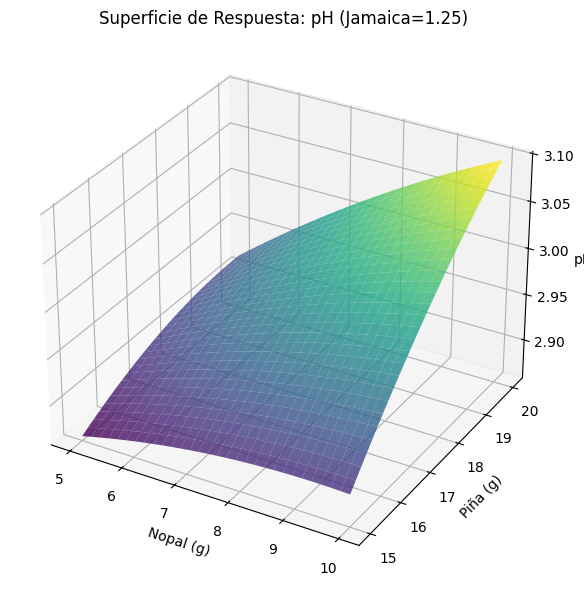


🔍 Evaluando modelo para variable: Preferencia
R²:           0.8216
R² ajustado:  0.0188
MAE:          0.0925
MSE:          0.0180
RMSE:         0.1341


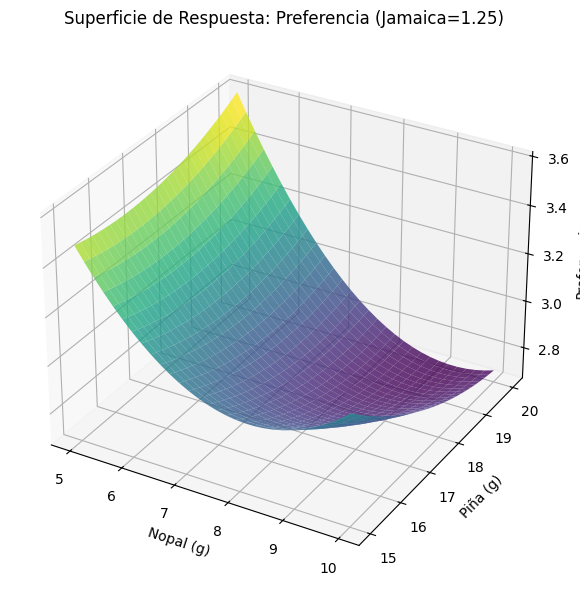


🔍 Evaluando modelo para variable: Antocianinas
R²:           0.7990
R² ajustado:  -0.1054
MAE:          29.4850
MSE:          1177.4380
RMSE:         34.3138


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


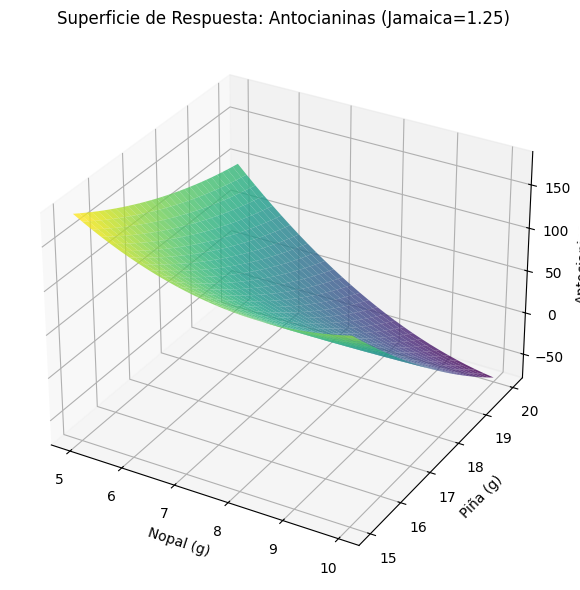

In [40]:
superficie_respuesta('pH', fixed_value=1.25)
superficie_respuesta('Preferencia', fixed_value=1.25)
superficie_respuesta('Antocianinas', fixed_value=1.25)


Observando los coeficientes del modelo

In [41]:
def mostrar_coeficientes(y_name):
    print(f"\n📌 Coeficientes del modelo cuadrático para: {y_name}")

    X = data[['Nopal', 'Piña', 'Jamaica']]
    y = data[y_name]

    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    # Obtener nombres de los términos
    nombres = poly.get_feature_names_out(['Nopal', 'Piña', 'Jamaica'])
    coeficientes = model.coef_
    intercepto = model.intercept_

    # Mostrar como tabla
    df_coef = pd.DataFrame({
        'Término': nombres,
        'Coeficiente': coeficientes
    })

    df_coef.loc[-1] = ['Intercepto', intercepto]  # Agregar intercepto al inicio
    df_coef.index = df_coef.index + 1
    df_coef = df_coef.sort_index()

    display(df_coef.round(4))

    # Gráfico de barras
    plt.figure(figsize=(10,5))
    plt.bar(df_coef['Término'], df_coef['Coeficiente'], color='teal')
    plt.title(f'Coeficientes del modelo para {y_name}')
    plt.xticks(rotation=45)
    plt.ylabel('Valor del coeficiente')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()



📌 Coeficientes del modelo cuadrático para: pH


,Término,Coeficiente
0,Intercepto,2.1228
1,Nopal,0.0411
2,Piña,0.0176
3,Jamaica,0.4193
4,Nopal^2,-0.0017
5,Nopal Piña,0.0060
6,Nopal Jamaica,-0.0800
7,Piña^2,-0.0023
8,Piña Jamaica,0.0363
9,Jamaica^2,-0.2015


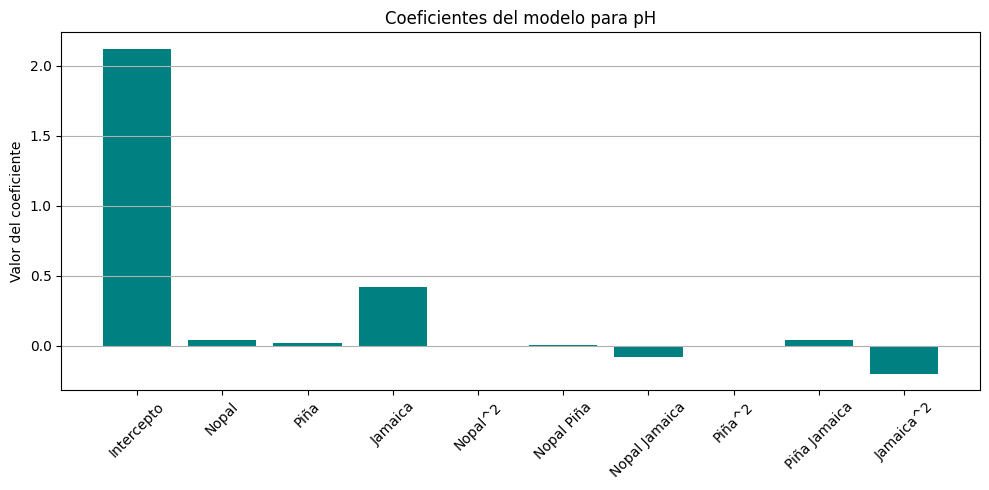


📌 Coeficientes del modelo cuadrático para: Preferencia


,Término,Coeficiente
0,Intercepto,7.8680
1,Nopal,-0.6365
2,Piña,-0.2739
3,Jamaica,0.6692
4,Nopal^2,0.0514
5,Nopal Piña,-0.0215
6,Nopal Jamaica,0.0964
7,Piña^2,0.0125
8,Piña Jamaica,-0.0253
9,Jamaica^2,-0.3535


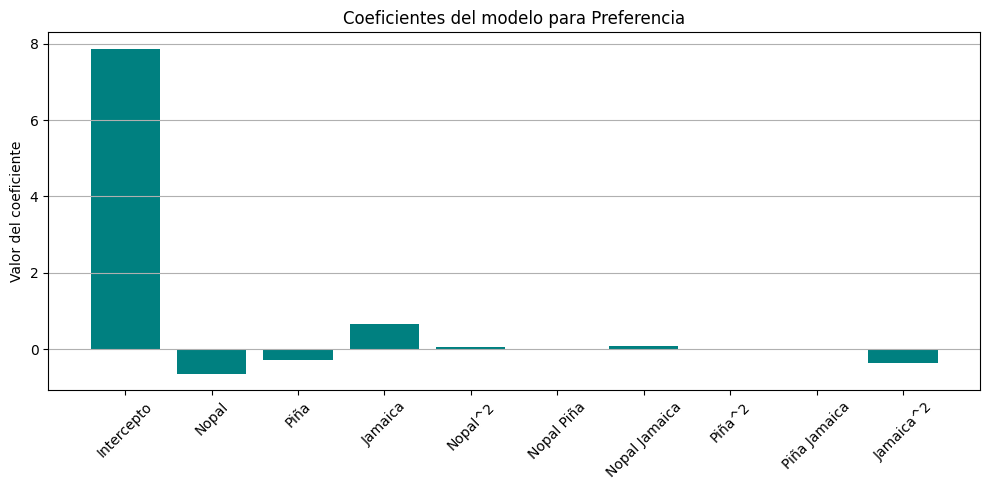


📌 Coeficientes del modelo cuadrático para: Antocianinas


,Término,Coeficiente
0,Intercepto,993.2341
1,Nopal,-78.2463
2,Piña,-33.6296
3,Jamaica,-144.5907
4,Nopal^2,5.1868
5,Nopal Piña,-5.0400
6,Nopal Jamaica,53.5720
7,Piña^2,1.8468
8,Piña Jamaica,-18.1837
9,Jamaica^2,66.9586


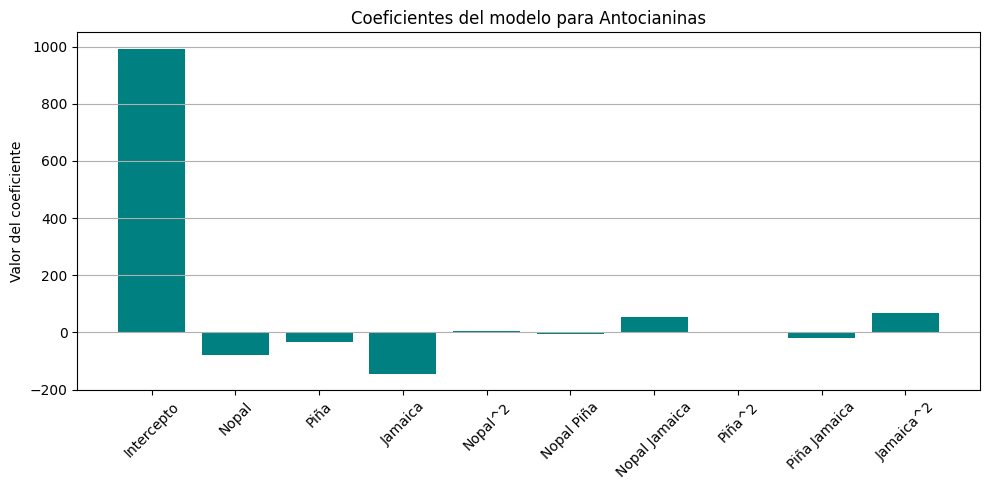

In [42]:
mostrar_coeficientes('pH')
mostrar_coeficientes('Preferencia')
mostrar_coeficientes('Antocianinas')


RESULTADOS EN TABLAS

In [43]:
def tabla_coeficientes_modelo(y_name):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    import pandas as pd
    import numpy as np

    print(f"\n📊 Coeficientes del modelo cuadrático para: {y_name}")

    # Variables independientes y respuesta
    X = data[['Nopal', 'Piña', 'Jamaica']]
    y = data[y_name]

    # Transformación cuadrática
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)
    nombres_terminos = poly.get_feature_names_out(X.columns)

    # Ajuste de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    # Extraer coeficientes y nombre de términos
    coeficientes = modelo.coef_
    intercepto = modelo.intercept_

    # Crear tabla con todos los coeficientes
    df_coef = pd.DataFrame({
        'Término': ['Intercepto'] + list(nombres_terminos),
        'Coeficiente': [intercepto] + list(coeficientes)
    })

    return df_coef.round(4)


In [44]:
# Tabla para pH
tabla_ph = tabla_coeficientes_modelo('pH')
display(tabla_ph)

# Tabla para Preferencia
tabla_preferencia = tabla_coeficientes_modelo('Preferencia')
display(tabla_preferencia)

# Tabla para Antocianinas
tabla_antocianinas = tabla_coeficientes_modelo('Antocianinas')
display(tabla_antocianinas)



📊 Coeficientes del modelo cuadrático para: pH


,Término,Coeficiente
0,Intercepto,2.1228
1,Nopal,0.0411
2,Piña,0.0176
3,Jamaica,0.4193
4,Nopal^2,-0.0017
5,Nopal Piña,0.0060
6,Nopal Jamaica,-0.0800
7,Piña^2,-0.0023
8,Piña Jamaica,0.0363
9,Jamaica^2,-0.2015



📊 Coeficientes del modelo cuadrático para: Preferencia


,Término,Coeficiente
0,Intercepto,7.8680
1,Nopal,-0.6365
2,Piña,-0.2739
3,Jamaica,0.6692
4,Nopal^2,0.0514
5,Nopal Piña,-0.0215
6,Nopal Jamaica,0.0964
7,Piña^2,0.0125
8,Piña Jamaica,-0.0253
9,Jamaica^2,-0.3535



📊 Coeficientes del modelo cuadrático para: Antocianinas


,Término,Coeficiente
0,Intercepto,993.2341
1,Nopal,-78.2463
2,Piña,-33.6296
3,Jamaica,-144.5907
4,Nopal^2,5.1868
5,Nopal Piña,-5.0400
6,Nopal Jamaica,53.5720
7,Piña^2,1.8468
8,Piña Jamaica,-18.1837
9,Jamaica^2,66.9586


Códigos para la optimización


In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
import numpy as np
import pandas as pd

In [57]:
# Datos
data = pd.DataFrame({
    'Nopal': [5, 10, 5, 10, 5, 10, 5, 10, 7.5, 7.5, 7.5, 7.5],
    'Piña': [15, 15, 20, 20, 15, 15, 20, 20, 17.5, 17.5, 17.5, 17.5],
    'Jamaica': [1.0, 1.0, 2.0, 2.0, 1.5, 1.5, 1.5, 1.5, 1.25, 1.25, 1.25, 1.25],
    'pH': [2.86, 2.94, 3.01, 2.84, 2.84, 2.82, 2.94, 3.07, 3.08, 2.87, 2.94, 2.98],
    'Preferencia': [3.537, 2.963, 3.278, 2.648, 3.370, 3.259, 3.463, 2.814, 3.111, 2.500, 2.833, 2.888],
    'Antocianinas': [224.1, 28.01, 122.7, 68.47, 149.33, 254.62, 42.0, 21.29, 40.49, 47.09, 46.51, 34.19]
})

In [58]:
# Entrenamos modelos cuadráticos
X = data[['Nopal', 'Piña', 'Jamaica']]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [59]:
# Modelos
models = {}
for y_name in ['pH', 'Preferencia', 'Antocianinas']:
    y = data[y_name]
    model = LinearRegression().fit(X_poly, y)
    models[y_name] = model

In [60]:
# Rango deseado para cada salida
rango = {
    'pH': (2.8, 3.1),
    'Preferencia': (2.5, 3.6),
    'Antocianinas': (20, 255)
}

In [61]:
# Función deseabilidad individual
def desirability(y, low, high, tipo='max'):
    if tipo == 'target':
        if y < low or y > high:
            return 0
        else:
            return 1
    elif tipo == 'max':
        return 0 if y <= low else (1 if y >= high else ((y - low) / (high - low)))
    elif tipo == 'range':
        return 0 if y < low or y > high else 1
    else:
        return 0

In [62]:
# Deseabilidad global
def deseabilidad_global(x):
    x = np.array(x).reshape(1, -1)
    x_poly = poly.transform(x)

    d_values = []

    # pH dentro de rango
    y_ph = models['pH'].predict(x_poly)[0]
    d_ph = desirability(y_ph, *rango['pH'], tipo='range')
    d_values.append(d_ph)

    # Preferencia máximo
    y_pref = models['Preferencia'].predict(x_poly)[0]
    d_pref = desirability(y_pref, *rango['Preferencia'], tipo='max')
    d_values.append(d_pref)

    # Antocianinas máximo
    y_ant = models['Antocianinas'].predict(x_poly)[0]
    d_ant = desirability(y_ant, *rango['Antocianinas'], tipo='max')
    d_values.append(d_ant)

    # Deseabilidad global
    D = np.prod(d_values)**(1/len(d_values))
    return -D  # Minimizar negativo = maximizar D

In [63]:
# Restricciones: valores dentro del dominio experimental
bounds = [(5, 10), (15, 20), (1.0, 2.0)]  # Nopal, Piña, Jamaica
x0 = [7.5, 17.5, 1.25]  # punto inicial

In [64]:
# Optimización
resultado = minimize(deseabilidad_global, x0, bounds=bounds)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

In [65]:
# Resultados
opt_nopal, opt_pina, opt_jamaica = resultado.x
x_opt = np.array([opt_nopal, opt_pina, opt_jamaica]).reshape(1, -1)
X_opt_poly = poly.transform(x_opt)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [66]:
print("\n🔎 RESULTADO DE OPTIMIZACIÓN MULTIOBJETIVO:")
print(f"Nopal óptimo:    {opt_nopal:.2f} g")
print(f"Piña óptima:     {opt_pina:.2f} g")
print(f"Jamaica óptima:  {opt_jamaica:.2f} g")
print("\n🔬 Respuestas estimadas:")
print(f"pH estimado:          {models['pH'].predict(X_opt_poly)[0]:.3f}")
print(f"Preferencia estimada: {models['Preferencia'].predict(X_opt_poly)[0]:.3f}")
print(f"Antocianinas estim.:  {models['Antocianinas'].predict(X_opt_poly)[0]:.2f}")


🔎 RESULTADO DE OPTIMIZACIÓN MULTIOBJETIVO:
Nopal óptimo:    5.00 g
Piña óptima:     15.00 g
Jamaica óptima:  1.00 g

🔬 Respuestas estimadas:
pH estimado:          2.835
Preferencia estimada: 3.482
Antocianinas estim.:  182.24


PARA EL BRIX SE TIENES

In [67]:
data['Brix'] = [1.35, 0.60, 1.65, 2.15, 1.40, 1.80, 0.75, 0.85, 1.15, 1.20, 1.15, 1.15]

In [68]:
# Entrenar modelos incluyendo Brix
X = data[['Nopal', 'Piña', 'Jamaica']]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [70]:
# Ajustar todos los modelos
models = {}
for y_name in ['pH', 'Preferencia', 'Antocianinas', 'Brix']:
    y = data[y_name]
    model = LinearRegression().fit(X_poly, y)
    models[y_name] = model


In [71]:
# Rango deseado para cada respuesta
rango = {
    'pH': (2.8, 3.1),
    'Preferencia': (2.5, 3.6),
    'Antocianinas': (20, 255),
    'Brix': (0.6, 2.2)
}

In [72]:
# Función de deseabilidad
def desirability(y, low, high, tipo='max'):
    if tipo == 'target':
        return 1 if low <= y <= high else 0
    elif tipo == 'max':
        return 0 if y <= low else (1 if y >= high else ((y - low) / (high - low)))
    elif tipo == 'range':
        return 1 if low <= y <= high else 0
    else:
        return 0

In [75]:
# Deseabilidad global con 4 variables
def deseabilidad_global(x):
    x = np.array(x).reshape(1, -1)
    x_poly = poly.transform(x)
    d_values = []

    # pH (rango)
    y_ph = models['pH'].predict(x_poly)[0]
    d_values.append(desirability(y_ph, *rango['pH'], tipo='range'))

    # Preferencia (max)
    y_pref = models['Preferencia'].predict(x_poly)[0]
    d_values.append(desirability(y_pref, *rango['Preferencia'], tipo='max'))

    # Antocianinas (max)
    y_ant = models['Antocianinas'].predict(x_poly)[0]
    d_values.append(desirability(y_ant, *rango['Antocianinas'], tipo='max'))

    # Brix (max)
    y_brix = models['Brix'].predict(x_poly)[0]
    d_values.append(desirability(y_brix, *rango['Brix'], tipo='max'))

    D = np.prod(d_values)**(1/len(d_values))
    return -D  # minimizar negativo para maximizar

In [76]:
# Optimización
from scipy.optimize import minimize

x0 = [7.5, 17.5, 1.25]
bounds = [(5, 10), (15, 20), (1.0, 2.0)]

resultado = minimize(deseabilidad_global, x0, bounds=bounds)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

In [77]:
# Mostrar resultados
opt_nopal, opt_pina, opt_jamaica = resultado.x
x_opt = np.array([opt_nopal, opt_pina, opt_jamaica]).reshape(1, -1)
x_poly_opt = poly.transform(x_opt)

print("\n🎯 OPTIMIZACIÓN MULTIOBJETIVO CON BRIX INCLUIDO")
print(f"Nopal óptimo:    {opt_nopal:.2f} g")
print(f"Piña óptima:     {opt_pina:.2f} g")
print(f"Jamaica óptima:  {opt_jamaica:.2f} g")

print("\n🔬 Respuestas estimadas:")
print(f"pH:           {models['pH'].predict(x_poly_opt)[0]:.3f}")
print(f"Preferencia:  {models['Preferencia'].predict(x_poly_opt)[0]:.3f}")
print(f"Antocianinas: {models['Antocianinas'].predict(x_poly_opt)[0]:.2f}")
print(f"Brix:         {models['Brix'].predict(x_poly_opt)[0]:.3f}")



🎯 OPTIMIZACIÓN MULTIOBJETIVO CON BRIX INCLUIDO
Nopal óptimo:    7.57 g
Piña óptima:     15.00 g
Jamaica óptima:  1.64 g

🔬 Respuestas estimadas:
pH:           2.801
Preferencia:  2.978
Antocianinas: 197.95
Brix:         2.207


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


GENERANDO RADAR PLOT

In [78]:
import matplotlib.pyplot as plt

In [79]:
# Valores estimados en el punto óptimo
y_opt = {
    'pH': models['pH'].predict(x_poly_opt)[0],
    'Preferencia': models['Preferencia'].predict(x_poly_opt)[0],
    'Antocianinas': models['Antocianinas'].predict(x_poly_opt)[0],
    'Brix': models['Brix'].predict(x_poly_opt)[0]
}

In [80]:
# Escalamos entre 0 y 1 según el rango deseado
valores_normalizados = []
etiquetas = []

for var in y_opt:
    low, high = rango[var]
    val = y_opt[var]
    val_norm = np.clip((val - low) / (high - low), 0, 1)
    valores_normalizados.append(val_norm)
    etiquetas.append(var)

In [84]:
# Preparar datos para radar
valores_normalizados.append(valores_normalizados[0])  # cerrar la figura
etiquetas.append(etiquetas[0])  # cerrar la figura


/tmp/ipython-input-85-1738205496.py:15: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


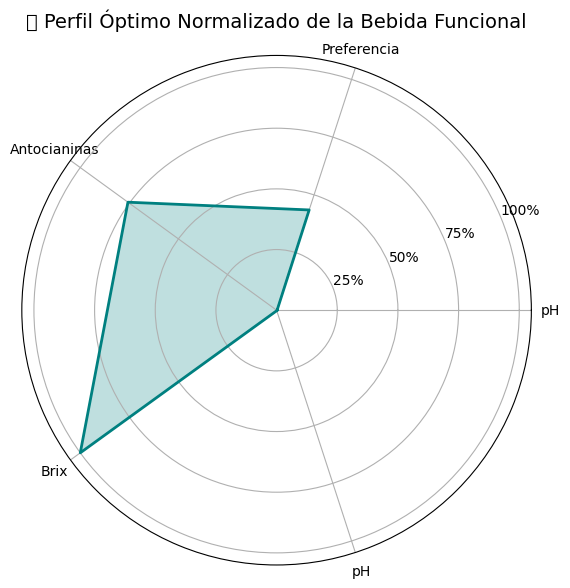

In [85]:
# Crear gráfico radar
angles = np.linspace(0, 2 * np.pi, len(etiquetas), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(polar=True))
ax.plot(angles, valores_normalizados, color='teal', linewidth=2)
ax.fill(angles, valores_normalizados, color='teal', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(etiquetas)
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['25%', '50%', '75%', '100%'])
ax.set_title('🎯 Perfil Óptimo Normalizado de la Bebida Funcional', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

MEJORANDO EL RADAR

In [86]:
# Valores del punto óptimo
y_opt = {
    'pH': models['pH'].predict(x_poly_opt)[0],
    'Preferencia': models['Preferencia'].predict(x_poly_opt)[0],
    'Antocianinas': models['Antocianinas'].predict(x_poly_opt)[0],
    'Brix': models['Brix'].predict(x_poly_opt)[0]
}

In [87]:
# Valores promedio del experimento
y_promedio = {
    'pH': data['pH'].mean(),
    'Preferencia': data['Preferencia'].mean(),
    'Antocianinas': data['Antocianinas'].mean(),
    'Brix': data['Brix'].mean()
}


In [95]:
# Función de normalización
def normalizar(valor, minimo, maximo):
    return np.clip((valor - minimo) / (maximo - minimo), 0, 1)


In [96]:
# Etiquetas
etiquetas = list(y_opt.keys())


In [97]:
# Normalizar ambos conjuntos
opt_norm = [normalizar(y_opt[var], *rango[var]) for var in etiquetas]
prom_norm = [normalizar(y_promedio[var], *rango[var]) for var in etiquetas]

In [98]:
# Cerrar figura (repetir primer valor)
opt_norm.append(opt_norm[0])
prom_norm.append(prom_norm[0])

In [99]:
# Ángulos
angles = np.linspace(0, 2 * np.pi, len(etiquetas), endpoint=False).tolist()
angles.append(angles[0]) # close the plot

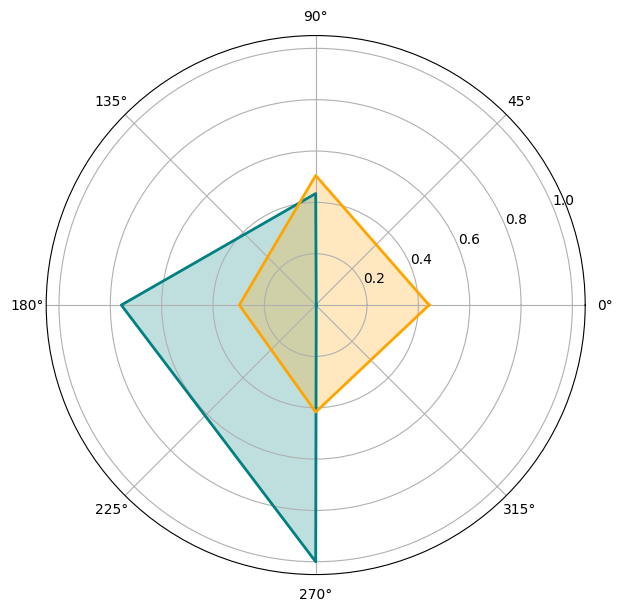

In [100]:
# Graficar
fig, ax = plt.subplots(figsize=(8, 7), subplot_kw=dict(polar=True))
ax.plot(angles, opt_norm, color='teal', linewidth=2, label='Óptimo')
ax.fill(angles, opt_norm, color='teal', alpha=0.25)
ax.plot(angles, prom_norm, color='orange', linewidth=2, label='Promedio Experimental')
ax.fill(angles, prom_norm, color='orange', alpha=0.25)


MÉTRICAS DEL BRIX

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [115]:
def calcular_metricas_brix():
    # Datos
    X = data[['Nopal', 'Piña', 'Jamaica']]
    y = data['Brix']

    # Transformación polinómica
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Modelo cuadrático
    modelo = LinearRegression().fit(X_poly, y)
    y_pred = modelo.predict(X_poly)

    # Métricas
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    n = len(y)
    p = X_poly.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print("📊 MÉTRICAS DEL MODELO PARA °BRIX")
    print(f"R²:           {r2:.4f}")
    print(f"R² ajustado:  {r2_adj:.4f}")
    print(f"MAE:          {mae:.4f}")
    print(f"MSE:          {mse:.4f}")
    print(f"RMSE:         {rmse:.4f}")

    return {
        'R2': r2,
        'R2 ajustado': r2_adj,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

In [116]:
# Ejecutar y guardar métricas
metricas_brix = calcular_metricas_brix()

📊 MÉTRICAS DEL MODELO PARA °BRIX
R²:           0.9667
R² ajustado:  0.8168
MAE:          0.0687
MSE:          0.0060
RMSE:         0.0776


TABLA COMPARATIVA

In [117]:
def calcular_metricas_generales(y_name):
    X = data[['Nopal', 'Piña', 'Jamaica']]
    y = data[y_name]
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)
    modelo = LinearRegression().fit(X_poly, y)
    y_pred = modelo.predict(X_poly)

    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    n = len(y)
    p = X_poly.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return {
        'R2': r2,
        'R2 ajustado': r2_adj,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }


In [118]:
# Variables a evaluar
variables = ['pH', 'Preferencia', 'Antocianinas', 'Brix']

# Diccionario para guardar métricas
metricas_modelos = {}

# Calcular y almacenar
for var in variables:
    metricas_modelos[var] = calcular_metricas_generales(var)

# Convertir a DataFrame
df_metricas_global = pd.DataFrame(metricas_modelos).T
df_metricas_global = df_metricas_global[['R2', 'R2 ajustado', 'MAE', 'MSE', 'RMSE']].round(4)

# Mostrar
print("📊 COMPARACIÓN GLOBAL DE MÉTRICAS DE MODELOS")
display(df_metricas_global)


📊 COMPARACIÓN GLOBAL DE MÉTRICAS DE MODELOS


,R2,R2 ajustado,MAE,MSE,RMSE
pH,0.6811,-0.7542,0.0375,0.0023,0.0484
Preferencia,0.8216,0.0188,0.0925,0.0180,0.1341
Antocianinas,0.7990,-0.1054,29.4850,1177.4380,34.3138
Brix,0.9667,0.8168,0.0687,0.0060,0.0776


IMPRESION DEL MODELO

In [119]:
def imprimir_ecuacion_brix():
    X = data[['Nopal', 'Piña', 'Jamaica']]
    y = data['Brix']

    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)
    modelo = LinearRegression().fit(X_poly, y)

    # Obtener términos y coeficientes
    terminos = poly.get_feature_names_out(X.columns)
    coef = modelo.coef_
    intercepto = modelo.intercept_

    # Construir ecuación
    ecuacion = f"Brix = {intercepto:.4f}"
    for t, c in zip(terminos, coef):
        signo = " + " if c >= 0 else " - "
        ecuacion += f"{signo}{abs(c):.4f}·{t}"

    print("🧮 Ecuación cuadrática del modelo para °Brix:\n")
    print(ecuacion)

# Ejecutar
imprimir_ecuacion_brix()


🧮 Ecuación cuadrática del modelo para °Brix:

Brix = 0.6322 + 0.4363·Nopal + 0.1882·Piña - 3.1460·Jamaica - 0.0453·Nopal^2 - 0.0120·Nopal Piña + 0.3100·Nopal Jamaica - 0.0022·Piña^2 - 0.1216·Piña Jamaica + 1.5581·Jamaica^2
